## 1.0 Identifying types of tables in database

In [13]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

q1 = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [15]:
q2 = 'SELECT * from facts LIMIT 5'
pd.read_sql_query(q2,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [20]:
# Return minimum population ,maximum population,minimum population growth,maximum population growth
 
q3 = '''
SELECT MIN(population), MAX(population), min(population_growth), max(population_growth)
FROM facts
'''

pd.read_sql_query(q3,conn)


,MIN(population),MAX(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


In [22]:
# Query to explore 0 population country

q4 = '''
SELECT *
FROM facts
WHERE Population == (
SELECT MIN(population) FROM facts
)
'''
pd.read_sql_query(q4,conn)


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [23]:
# Query to explore 0 population country

q4 = '''
SELECT *
FROM facts
WHERE Population == (
SELECT MAX(population) FROM facts
)
'''
pd.read_sql_query(q4,conn)


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca760d1278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fca76a4c438>]], dtype=object)

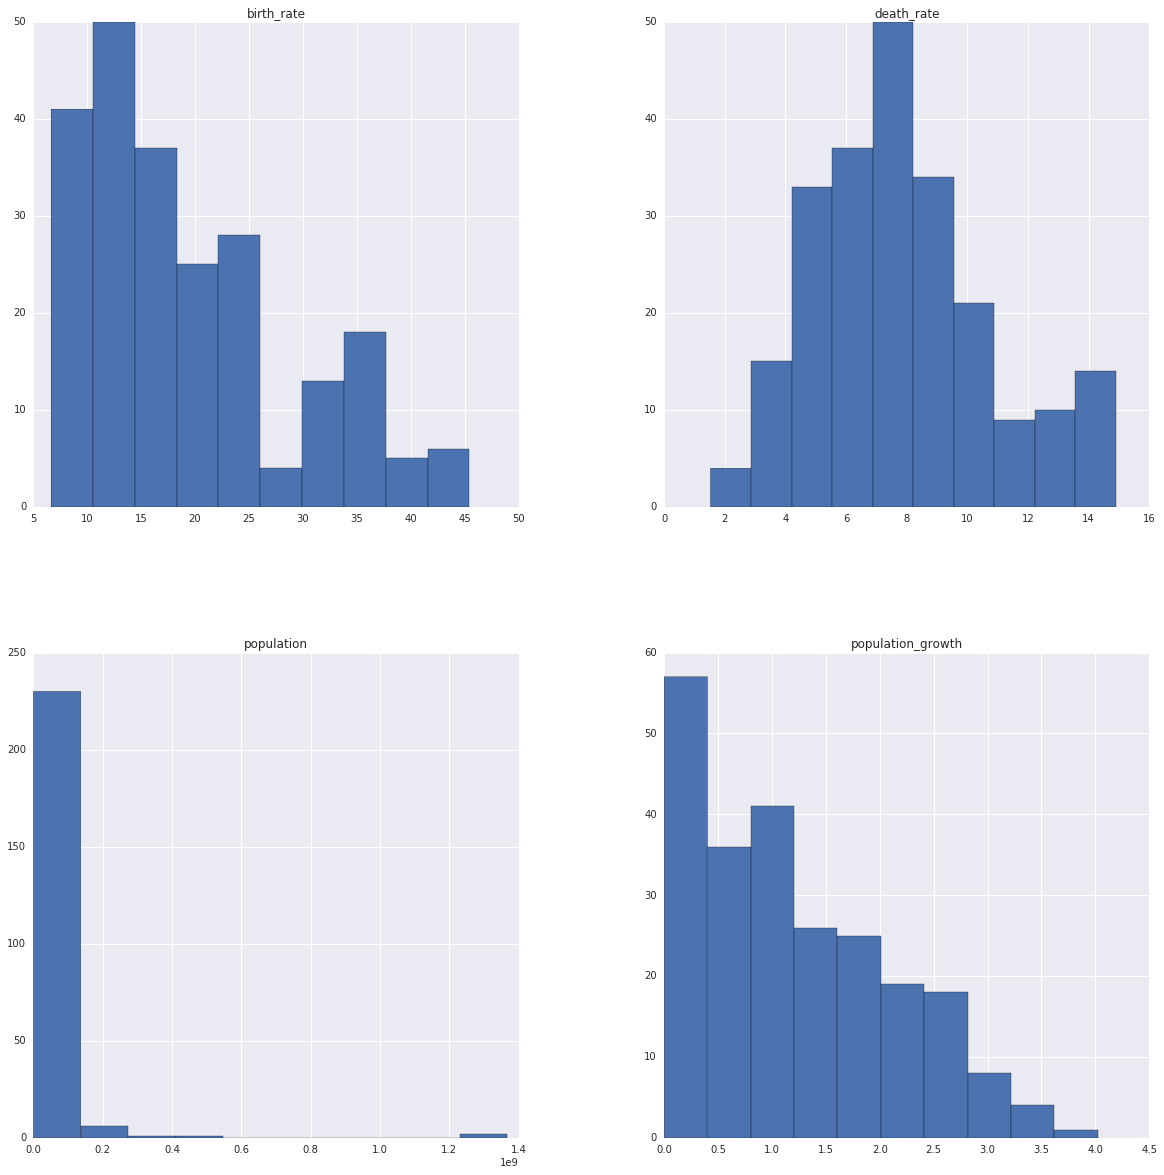

In [26]:
# Visualize non-outlier rows in a 2 by 2 grid historgram
# for population, population_growth, birth_date, death_rate

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111)

q6= '''
SELECT population, population_growth, birth_rate, death_rate
FROM facts
where population != (select max(population) from facts)
AND population != (select min(population) from facts);
'''

pd.read_sql_query(q6,conn).hist(ax=ax)